In [137]:
import json

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
import urllib
import requests
import warnings
warnings.filterwarnings ('ignore')
import requests
import csv
from contextlib import closing
import matplotlib.pyplot as plt
%matplotlib inline

import urllib.request
from subprocess import check_output 

In [2]:
#Henter data in fra Amazon server fra EB
df_total = pd.DataFrame(columns = [])

#starter med at hente datasæt 10-20 for at analysere mnindre data til at starte med
for i in range(10,20): 
    file_path = "https://s3-eu-west-1.amazonaws.com/cbsdump/cbs_2018_ga_data/bq%252Fcbs_2018_dump_0000000000" + str(i)
    #print(file_path)
    print("Loading dataset: {}".format(file_path))
    data_temp_1 = pd.read_csv(file_path, compression = 'gzip')
    df_total = pd.concat([df_total, data_temp_1], axis = 0)

    #laver en pickle fil for at kunne åbne meget data hurtigt, man vil også kunne lave det til en CSV fil
df_total.to_pickle('eb_data_total_dataframe_1.pkl')

Loading dataset: https://s3-eu-west-1.amazonaws.com/cbsdump/cbs_2018_ga_data/bq%252Fcbs_2018_dump_000000000010
Loading dataset: https://s3-eu-west-1.amazonaws.com/cbsdump/cbs_2018_ga_data/bq%252Fcbs_2018_dump_000000000011
Loading dataset: https://s3-eu-west-1.amazonaws.com/cbsdump/cbs_2018_ga_data/bq%252Fcbs_2018_dump_000000000012
Loading dataset: https://s3-eu-west-1.amazonaws.com/cbsdump/cbs_2018_ga_data/bq%252Fcbs_2018_dump_000000000013
Loading dataset: https://s3-eu-west-1.amazonaws.com/cbsdump/cbs_2018_ga_data/bq%252Fcbs_2018_dump_000000000014
Loading dataset: https://s3-eu-west-1.amazonaws.com/cbsdump/cbs_2018_ga_data/bq%252Fcbs_2018_dump_000000000015
Loading dataset: https://s3-eu-west-1.amazonaws.com/cbsdump/cbs_2018_ga_data/bq%252Fcbs_2018_dump_000000000016
Loading dataset: https://s3-eu-west-1.amazonaws.com/cbsdump/cbs_2018_ga_data/bq%252Fcbs_2018_dump_000000000017
Loading dataset: https://s3-eu-west-1.amazonaws.com/cbsdump/cbs_2018_ga_data/bq%252Fcbs_2018_dump_000000000018
L

In [3]:
#Her henter vi datafil 0-10 fordi det er nemmere at gøre seperat

for j in range(0,10): 
    file_path = "https://s3-eu-west-1.amazonaws.com/cbsdump/cbs_2018_ga_data/bq%252Fcbs_2018_dump_00000000000" + str(i)
    print(file_path)
    print("Loading dataset: {}".format(file_path))
    data_temp_2 = pd.read_csv(file_path, compression = 'gzip')
    df_total = pd.concat([df_total, data_temp_2], axis = 0)
  #Her gør vi det samme som oven over  
df_total.to_pickle('eb_data_total_dataframe_2.pkl')


https://s3-eu-west-1.amazonaws.com/cbsdump/cbs_2018_ga_data/bq%252Fcbs_2018_dump_0000000000019
Loading dataset: https://s3-eu-west-1.amazonaws.com/cbsdump/cbs_2018_ga_data/bq%252Fcbs_2018_dump_0000000000019


HTTPError: HTTP Error 403: Forbidden

In [4]:
#Denne tæller hvor mange instanser der er i hver kolonne 
df_total.count()

id            6324860
date          6919340
hour          6919340
path          6919340
section       6888848
subscriber    6888848
type          6888849
region        6919340
pageviews     6919340
dtype: int64

In [5]:
#Denne viser dataen generelt, der er sat tallet 10 for at vise de første 10 rækker
df_total.head(10)

,id,date,hour,path,section,subscriber,type,region,pageviews
0,NaN,20180905,17,/,1.0,anonymous,sektionsforside,(not set),18
1,NaN,20180317,2,/,1.0,anonymous,sektionsforside,(not set),5
2,NaN,20180113,19,/,1.0,registered,sektionsforside,(not set),5
3,NaN,20181207,18,/,1.0,anonymous,sektionsforside,(not set),7
4,NaN,20181108,4,/,1.0,anonymous,sektionsforside,(not set),1
5,NaN,20180608,2,/,1.0,anonymous,sektionsforside,(not set),6
6,NaN,20180727,7,/,1.0,registered,sektionsforside,(not set),1
7,NaN,20180925,18,/,1.0,anonymous,sektionsforside,(not set),38
8,NaN,20180609,11,/,1.0,anonymous,sektionsforside,(not set),29
9,NaN,20181025,10,/,1.0,anonymous,sektionsforside,(not set),99


In [6]:
#Nu læser vi csv filen fra Dan 
df_article = pd.read_csv('articledata.csv',encoding='latin-1')

In [7]:
#Gør det samme som ovenfor 
df_article.head(10)

,Unnamed: 0,id,title,byline,homesection,publishdate
0,1,3000000,"tester æøå, ÆØÅ",NaN,New Articles,2007-10-15 12:20:21
1,2,3000004,aaaaa,NaN,New Articles,2007-10-26 09:40:35
2,3,3000011,Paula i bitter nabokrig,NaN,New Articles,2007-11-27 15:52:06
3,4,3000012,Emily Blunt får ikke sunget serenader hver aften,NaN,flash,2007-11-27 16:14:00
4,5,3000013,Emily Blunt får ikke sunget serenader hver aften,NaN,flash,2007-11-27 16:15:03
5,6,3000017,Test Mercury 1,NaN,sportsub123456789,2007-11-28 18:16:01
6,7,3000022,Hanks beskyldt for mishandling,Niklas Roar,Intl. kendte,2006-09-20 11:24:18
7,8,3000030,Terrorsag afbrudt før klimaks,/ritzau/,Politik,2006-10-18 17:12:45
8,9,3000035,Børn fundet døde i grotesk mordsag,Mikkel Selin,112,2006-09-24 07:19:14
9,10,3000040,Poker: Carlos ude i London,Jonas Hüttel,Poker,2006-09-23 23:01:18


In [138]:
#Her merger vi de to filer
#Dette giver os attributterne title, homesection, publishdate
# ID'et bruger vi til at sammenligne de to filer 

result = pd.merge(df_total,
                 df_article[['title', 'homesection', 'publishdate', 'id']],
                 on='id')
result.head()

,id,date,hour,path,section,subscriber,type,region,pageviews,title,homesection,publishdate
0,6981417.0,20180103,19,/side9/lea/6981417,572.0,anonymous,artikel,(not set),1,Lea,Side 9,2018-01-03 02:00:00
1,6981417.0,20180106,8,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,2,Lea,Side 9,2018-01-03 02:00:00
2,6981417.0,20180103,18,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00
3,6981417.0,20180107,8,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00
4,6981417.0,20180610,15,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,1,Lea,Side 9,2018-01-03 02:00:00


In [131]:
result.head()

,id,date,hour,path,section,subscriber,type,region,pageviews,title,homesection,publishdate
0,6981417.0,20180103,19,/side9/lea/6981417,572.0,anonymous,artikel,(not set),1,Lea,Side 9,2018-01-03 02:00:00
1,6981417.0,20180106,8,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,2,Lea,Side 9,2018-01-03 02:00:00
2,6981417.0,20180103,18,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00
3,6981417.0,20180107,8,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00
4,6981417.0,20180610,15,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,1,Lea,Side 9,2018-01-03 02:00:00


In [83]:
# Tæller antallet af Nan i ID kolonnen, bemærk at det er i Df_total datasættet og IKKE result
df_total.id.isna().sum()

594480

In [84]:
# Her er det muligt at tælle antallet af attributter i en specifik kolonne
set(result.region)

{'(not set)',
 'Capital Region of Denmark',
 'Central Denmark Region',
 'North Denmark Region',
 'Region Syddanmark',
 'Region Zealand',
 'Region of Southern Denmark'}

In [85]:
# Tæller hvor mange der er i region
result.region.count()

6249904

In [86]:
# tæller antallet af instanser i attributterne i region objektet
from collections import Counter
Counter(result.region)

Counter({'(not set)': 24387,
         'Region Zealand': 859600,
         'Region Syddanmark': 134990,
         'North Denmark Region': 704995,
         'Central Denmark Region': 1253592,
         'Capital Region of Denmark': 2303255,
         'Region of Southern Denmark': 969085})

In [87]:
# viser den nye data efter filerne er blevet merget
result.head()

,id,date,hour,path,section,subscriber,type,region,pageviews,title,homesection,publishdate
0,6981417.0,20180103,19,/side9/lea/6981417,572.0,anonymous,artikel,(not set),1,Lea,Side 9,2018-01-03 02:00:00
1,6981417.0,20180106,8,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,2,Lea,Side 9,2018-01-03 02:00:00
2,6981417.0,20180103,18,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00
3,6981417.0,20180107,8,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00
4,6981417.0,20180610,15,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,1,Lea,Side 9,2018-01-03 02:00:00


In [88]:
# Tæller antallet af kolonner med null values i df_total datasættet
len(df_total) - df_total.count()

id            594480
date               0
hour               0
path               0
section        30492
subscriber     30492
type           30491
region             0
pageviews          0
dtype: int64

In [89]:
# Tæller antallet af kolonner med null values i result datasættet
len(result) - result.count()

id             0
date           0
hour           0
path           0
section        0
subscriber     0
type           0
region         0
pageviews      0
title          0
homesection    0
publishdate    0
dtype: int64

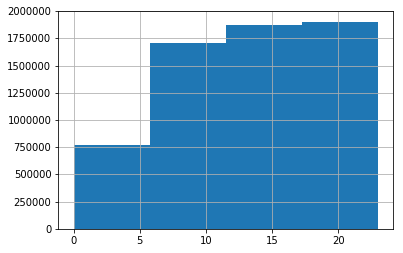

In [90]:
#morgen 6-10
#middag 10-17
#aften 17-0 
#nat 0-6
result['hour'].hist(bins=4)

In [17]:
views_hours =pd.DataFrame()
grouped = result.groupby('hour')['pageviews'].sum()
list_hours = [x for x in range(0,24)]
views_hours['hour'] = pd.Series(list_hours)
views_hours['views'] = pd.Series(grouped)

In [91]:
result.groupby('hour')['pageviews'].sum()

hour
0      3892521
1      1859006
2      1176049
3      1052078
4      1598074
5      4213800
6      8942425
7     11743439
8     13255167
9     12850151
10    10643725
11    10520083
12    11354900
13    10311110
14     9839456
15    10267821
16    10981060
17    10701584
18    10405229
19    11014831
20    11289190
21    12099374
22    11362446
23     7485867
Name: pageviews, dtype: int64

In [19]:
views_hours

,hour,views
0,0,3892521
1,1,1859006
2,2,1176049
3,3,1052078
4,4,1598074
5,5,4213800
6,6,8942425
7,7,11743439
8,8,13255167
9,9,12850151


In [22]:
result.to_csv('TEST.csv')

KeyboardInterrupt: 

In [142]:
#Laver en ny inddeling og kalder den Time_of_Day 
binInterval = [-1, 6, 12, 18, 23]
binLabels   = ["1", "2", "3", "4"]
result['Time_of_Day'] = pd.cut(result['hour'], bins = binInterval, labels=binLabels)

In [143]:
result.head()

,id,date,hour,path,section,subscriber,type,region,pageviews,title,homesection,publishdate,Time_of_Day,region_trans
0,6981417.0,20180103,19,/side9/lea/6981417,572.0,anonymous,artikel,(not set),1,Lea,Side 9,2018-01-03 02:00:00,4,0
1,6981417.0,20180106,8,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,2,Lea,Side 9,2018-01-03 02:00:00,2,5
2,6981417.0,20180103,18,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00,3,5
3,6981417.0,20180107,8,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00,2,5
4,6981417.0,20180610,15,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,1,Lea,Side 9,2018-01-03 02:00:00,3,5


In [144]:
result=result[result.region != '(not set)']


In [145]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(result.region)
result['region_trans']=le.transform(result.region)
result.head()

,id,date,hour,path,section,subscriber,type,region,pageviews,title,homesection,publishdate,Time_of_Day,region_trans
1,6981417.0,20180106,8,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,2,Lea,Side 9,2018-01-03 02:00:00,2,4
2,6981417.0,20180103,18,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00,3,4
3,6981417.0,20180107,8,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00,2,4
4,6981417.0,20180610,15,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,1,Lea,Side 9,2018-01-03 02:00:00,3,4
5,6981417.0,20180111,20,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,1,Lea,Side 9,2018-01-03 02:00:00,4,4


In [146]:
from collections import Counter
Counter(result.region)

Counter({'Region Zealand': 859600,
         'Region Syddanmark': 134990,
         'North Denmark Region': 704995,
         'Central Denmark Region': 1253592,
         'Capital Region of Denmark': 2303255,
         'Region of Southern Denmark': 969085})

In [149]:
result.head(1000)

,id,date,hour,path,section,subscriber,type,region,pageviews,title,homesection,publishdate,Time_of_Day,region_trans
1,6981417.0,20180106,8,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,2,Lea,Side 9,2018-01-03 02:00:00,2,4
2,6981417.0,20180103,18,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00,3,4
3,6981417.0,20180107,8,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00,2,4
4,6981417.0,20180610,15,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,1,Lea,Side 9,2018-01-03 02:00:00,3,4
5,6981417.0,20180111,20,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,1,Lea,Side 9,2018-01-03 02:00:00,4,4
6,6981417.0,20180110,1,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,3,Lea,Side 9,2018-01-03 02:00:00,1,4
7,6981417.0,20180809,15,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,1,Lea,Side 9,2018-01-03 02:00:00,3,4
8,6981417.0,20180109,7,/side9/lea/6981417,572.0,registered,artikel,Region Syddanmark,1,Lea,Side 9,2018-01-03 02:00:00,2,3
9,6981417.0,20180107,4,/side9/lea/6981417,572.0,anonymous,artikel,Region Syddanmark,2,Lea,Side 9,2018-01-03 02:00:00,1,3
10,6981417.0,20180105,22,/side9/lea/6981417,572.0,anonymous,artikel,Region Syddanmark,46,Lea,Side 9,2018-01-03 02:00:00,4,3


In [152]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(result.type)
result['type_trans']=le.transform(result.type)
result.head()

,id,date,hour,path,section,subscriber,type,region,pageviews,title,homesection,publishdate,Time_of_Day,region_trans,type_trans
1,6981417.0,20180106,8,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,2,Lea,Side 9,2018-01-03 02:00:00,2,4,0
2,6981417.0,20180103,18,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00,3,4,0
3,6981417.0,20180107,8,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00,2,4,0
4,6981417.0,20180610,15,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,1,Lea,Side 9,2018-01-03 02:00:00,3,4,0
5,6981417.0,20180111,20,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,1,Lea,Side 9,2018-01-03 02:00:00,4,4,0


In [158]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(result.subscriber)
result['subscriber_trans']=le.transform(result.subscriber)
result.head()

,id,date,hour,path,section,subscriber,type,region,pageviews,title,homesection,publishdate,Time_of_Day,region_trans,type_trans,subscriber_trans
1,6981417.0,20180106,8,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,2,Lea,Side 9,2018-01-03 02:00:00,2,4,0,1
2,6981417.0,20180103,18,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00,3,4,0,1
3,6981417.0,20180107,8,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,11,Lea,Side 9,2018-01-03 02:00:00,2,4,0,0
4,6981417.0,20180610,15,/side9/lea/6981417,572.0,anonymous,artikel,Region Zealand,1,Lea,Side 9,2018-01-03 02:00:00,3,4,0,0
5,6981417.0,20180111,20,/side9/lea/6981417,572.0,registered,artikel,Region Zealand,1,Lea,Side 9,2018-01-03 02:00:00,4,4,0,1
